<a href="https://colab.research.google.com/github/veapasichnyk/Deposit-forecasting/blob/main/Mid_term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

##Імпорти

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

##Завантаження даних

In [ ]:
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [ ]:
df = df[~df.duplicated()] #видалення дублікатів колонок

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Огляд даних
print(df.shape)
print(df.info())

(41176, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 no

**Спостереження**

Усе виглядає добре! Дані повні (без пропущених значень у NaN), і обсяг досить великий (41 176 записів), тож можна сміливо переходити до EDA.

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
y = df['y'].map({'yes': 1, 'no': 0})

##EDA

###Розподіл цільової змінної `y`

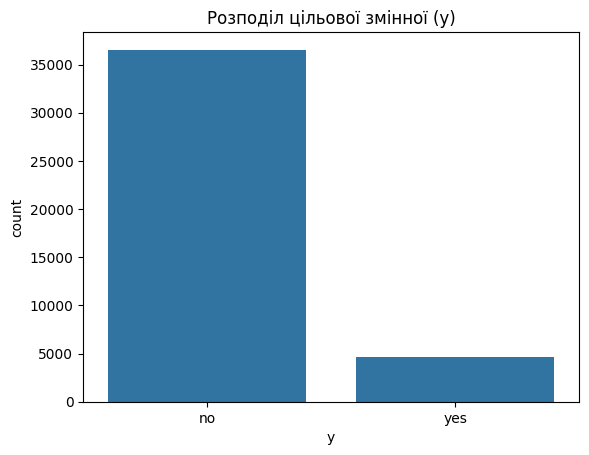

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


In [ ]:
# Частота класів
sns.countplot(data=df, x='y')
plt.title('Розподіл цільової змінної (y)')
plt.show()

# Частка
print(df['y'].value_counts(normalize=True))

**Спостереження**

Сильний дисбаланс (no ≈ 88%, yes ≈ 11%).

###Аналіз пропущених/невідомих значень

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.drop('y')

for col in cat_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} ('unknown' = {(unknown_count / len(df) * 100):.2f}%)")

job: 330 ('unknown' = 0.80%)
marital: 80 ('unknown' = 0.19%)
education: 1730 ('unknown' = 4.20%)
default: 8596 ('unknown' = 20.88%)
housing: 990 ('unknown' = 2.40%)
loan: 990 ('unknown' = 2.40%)


**Спостереження**

default	20.87% - висока частка, варто залишити як окрему категорію (має інформативність).

### Одновимірний аналіз

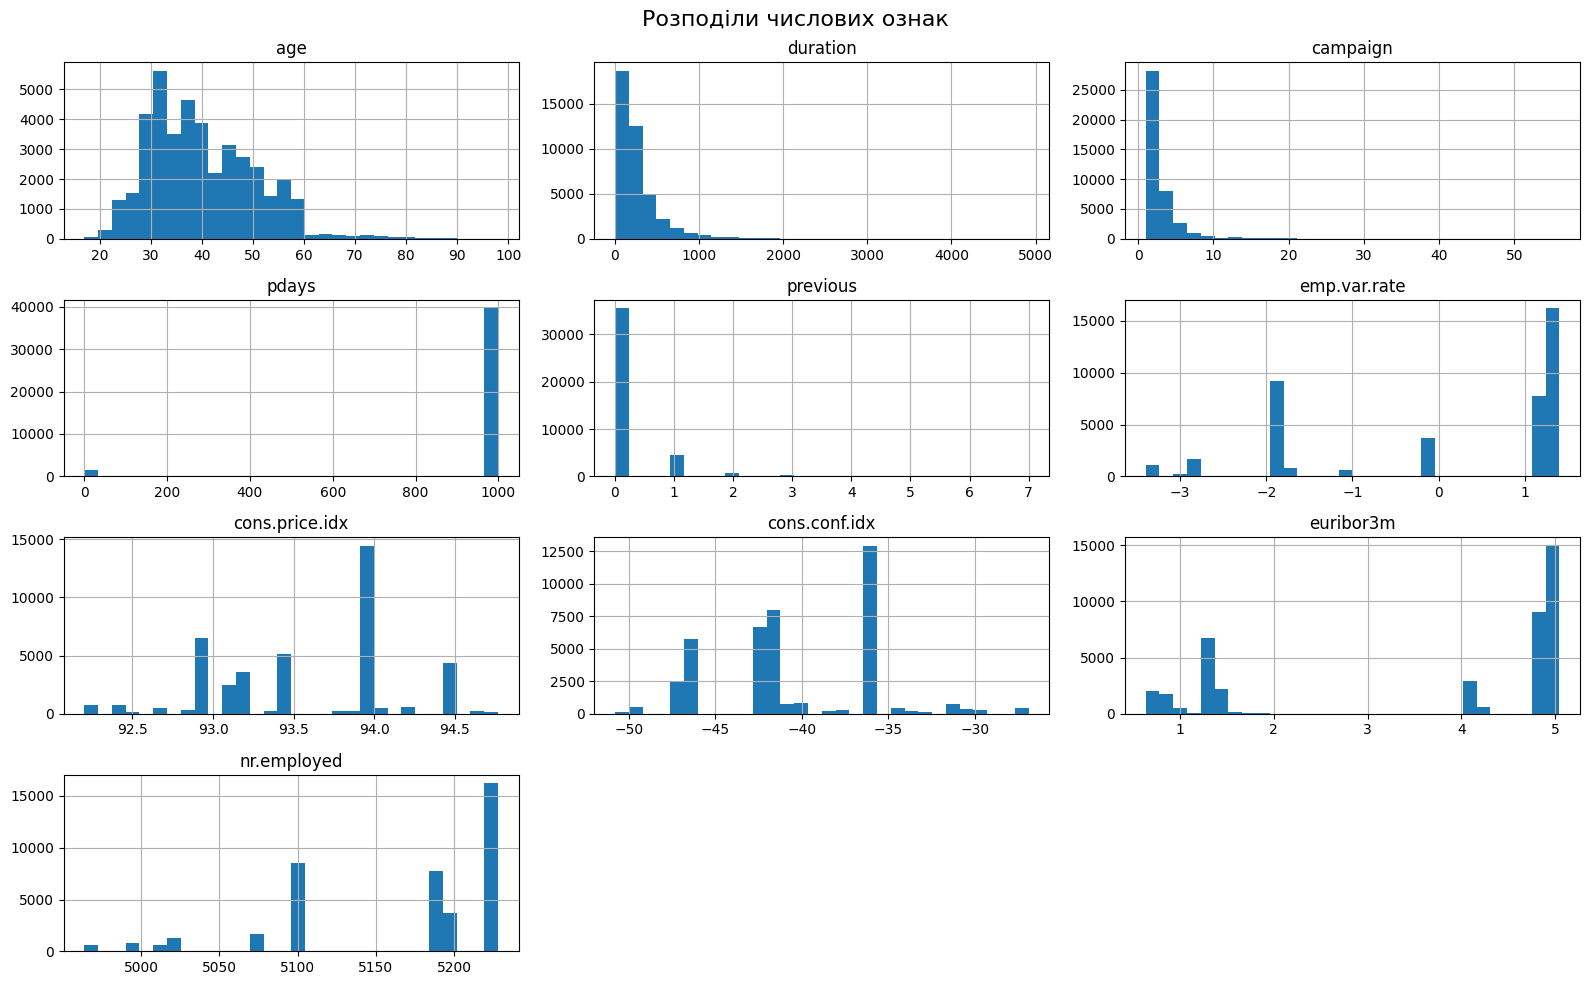

In [ ]:
# Одновимірний аналіз числових змінних
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].describe().T  # описова статистика

df[numeric_cols].hist(bins=30, figsize=(16, 10))
plt.suptitle("Розподіли числових ознак", fontsize=16)
plt.tight_layout()
plt.show()

**Спостереження**

campaign, pdays, previous - мають скошені розподіли, є потенційні виброси.

emp.var.rate, euribor3m - важливі для моделі, але варто перевірити лінійність.

/tmp/ipython-input-882539512.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-882539512.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-882539512.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-882539512.py:15: FutureWarning: 

Pa

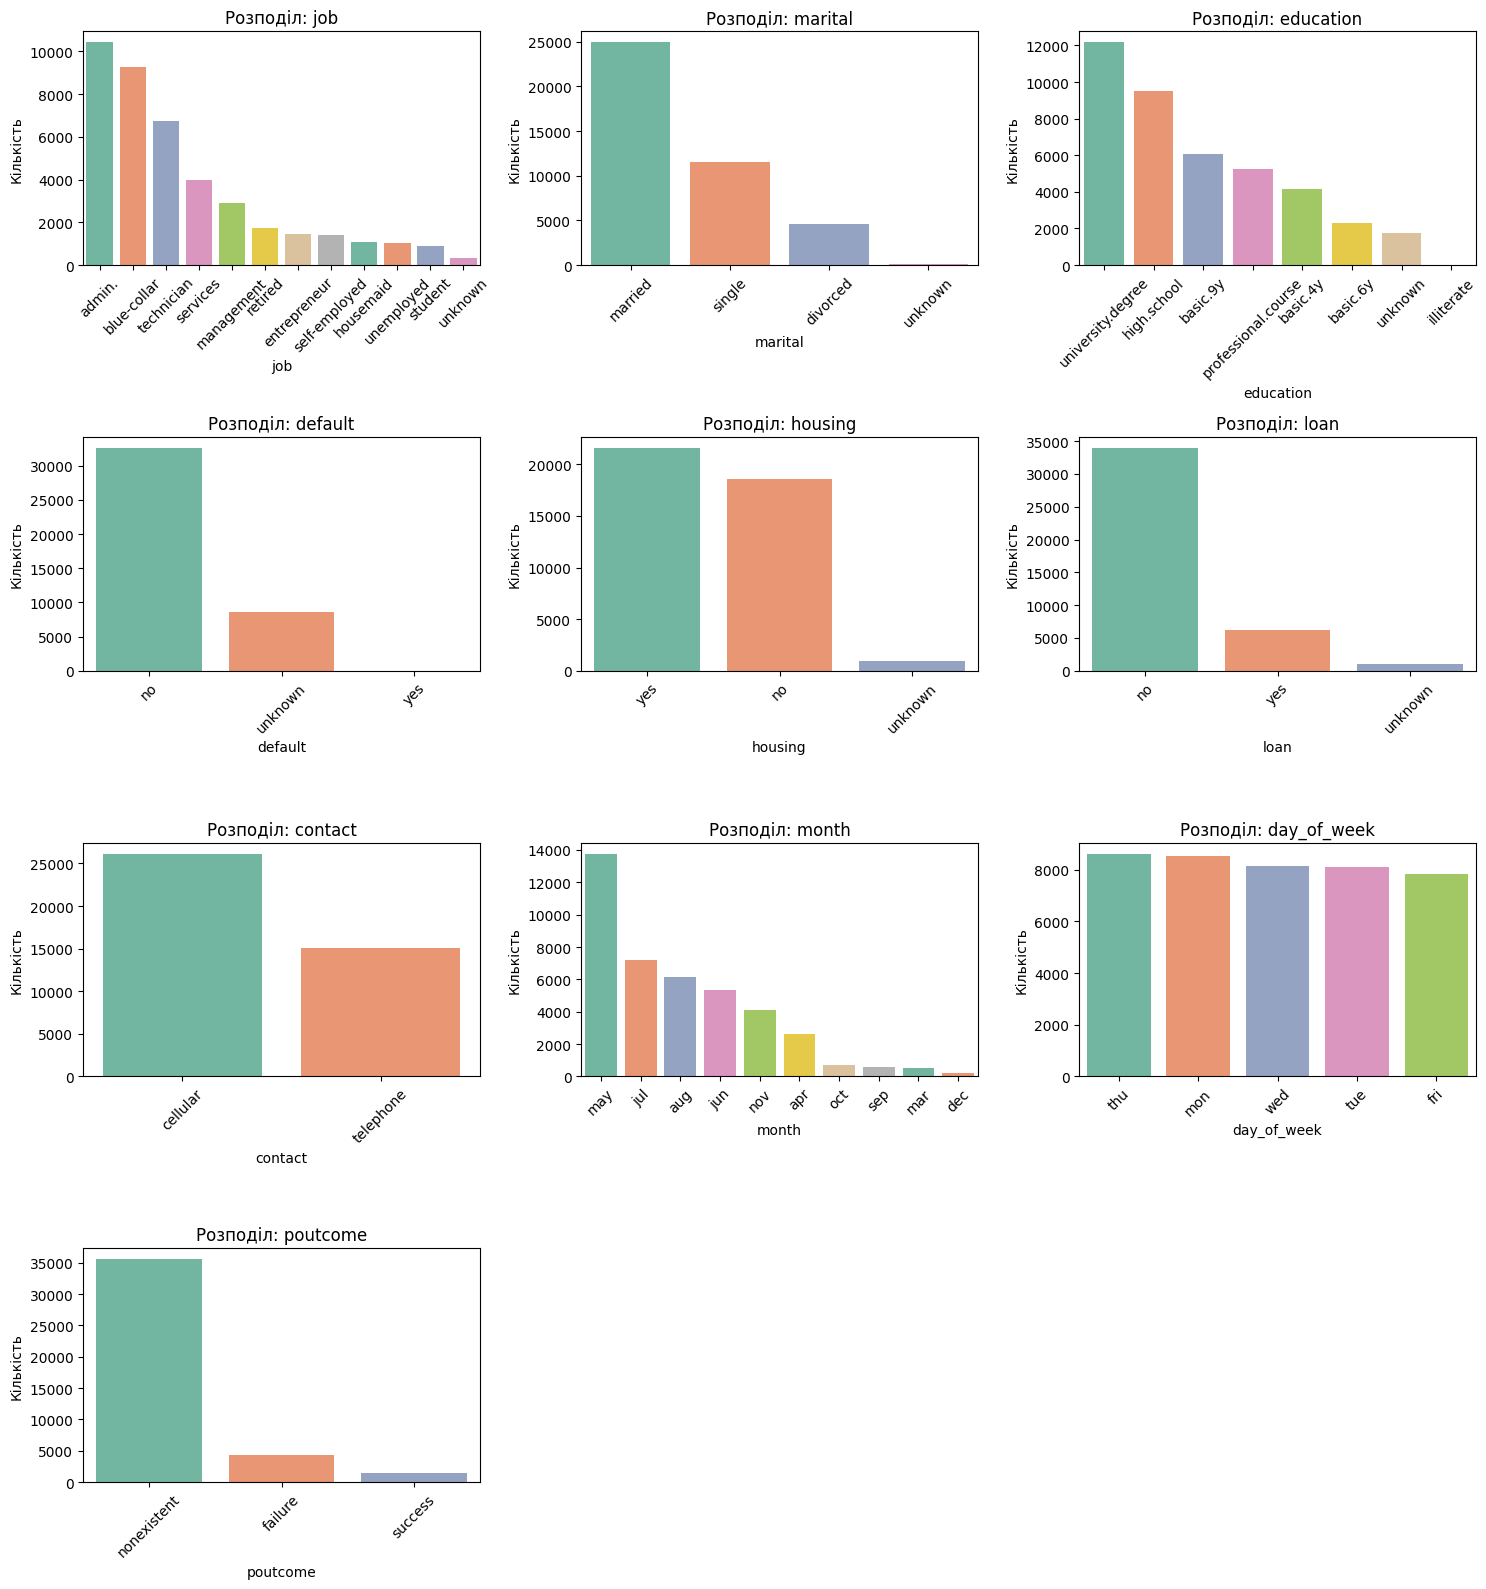

In [ ]:
# Одновимірний аналіз категоріальних змінних
# Категоріальні змінні (без цільової)
cat_cols = df.select_dtypes(include='object').drop(columns='y').columns

# Розміри сітки
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

# Створення полотна
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Побудова графіків
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
    axes[i].set_title(f'Розподіл: {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Кількість')

# Видалити порожні осі, якщо є
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Спостереження**

- job: багато категорій, включаючи unknown.

- month: найбільше контактів у травні (may).

- contact: два типи - cellular і telephone, cellular домінує.

- education: важливо для цільової змінної - часто впливає.

### Двовимірний аналіз

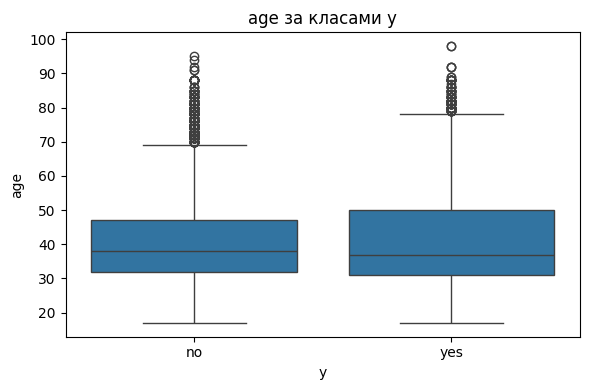

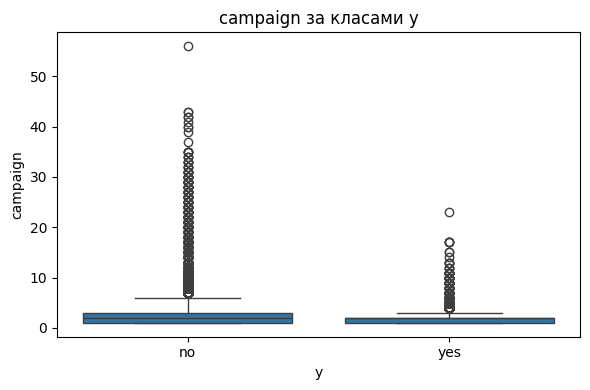

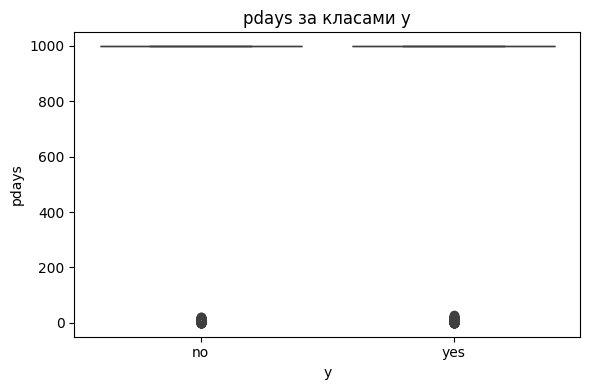

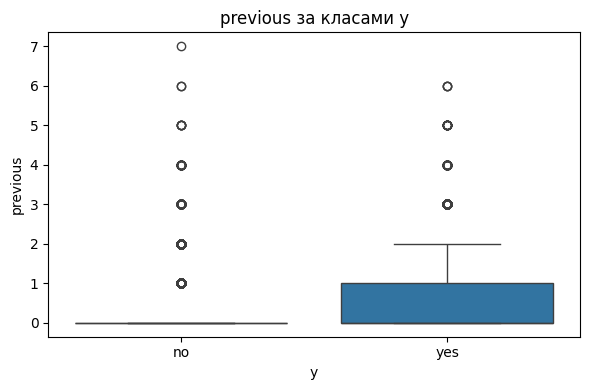

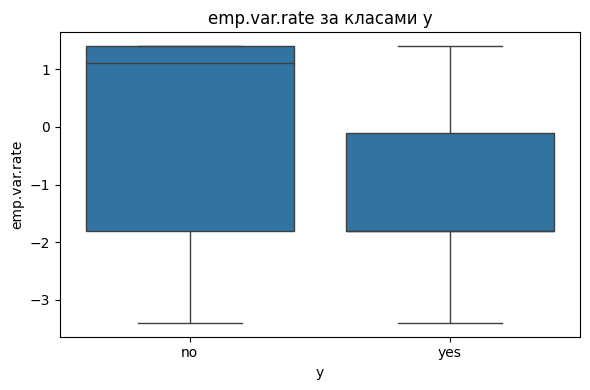

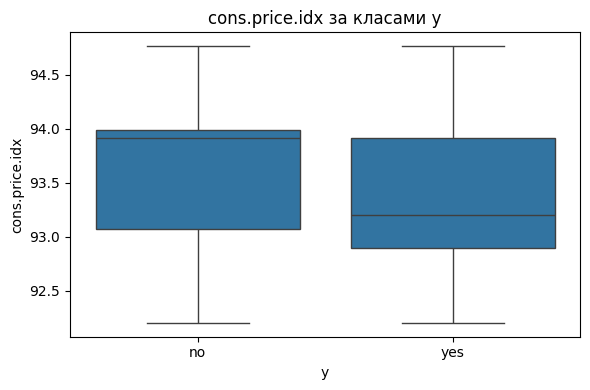

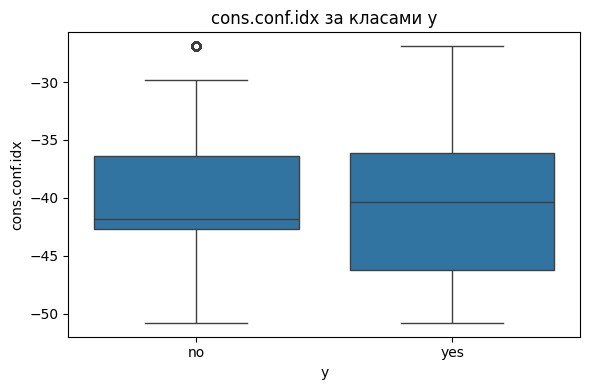

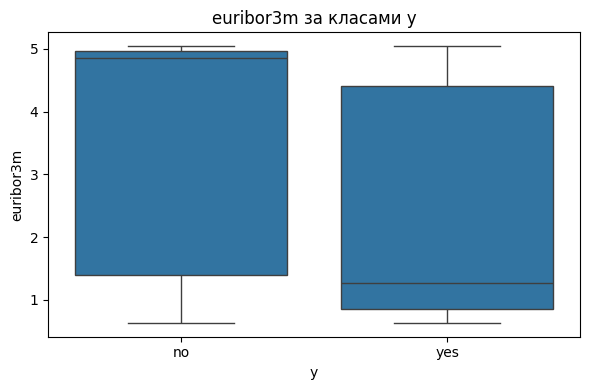

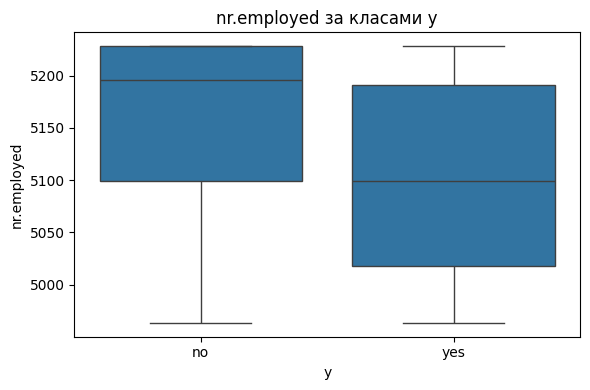

In [ ]:
# Двовимірний: числові змінні vs цільова змінна
for col in numeric_cols:
    if col != 'duration':  # виключаємо leakage
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x='y', y=col)
        plt.title(f'{col} за класами y')
        plt.tight_layout()
        plt.show()

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


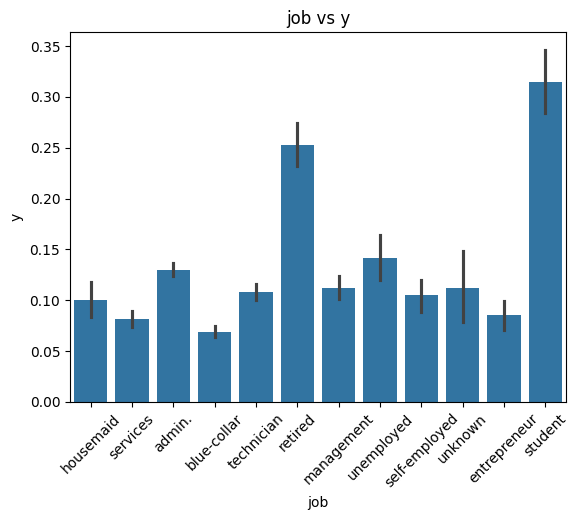

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


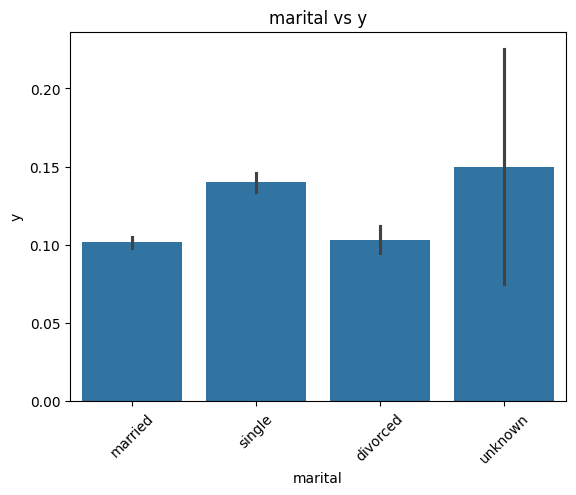

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


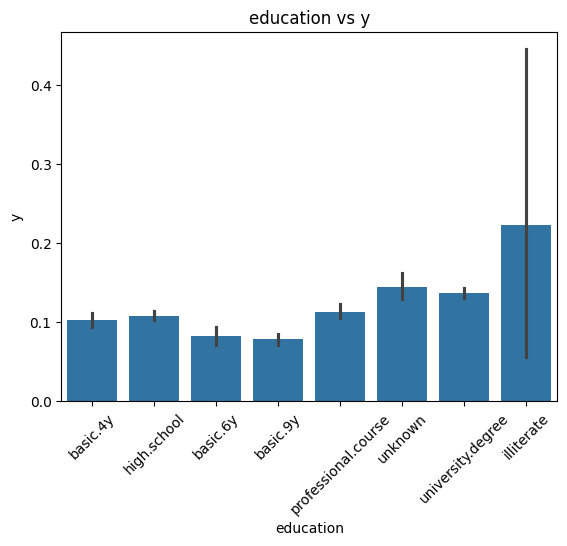

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


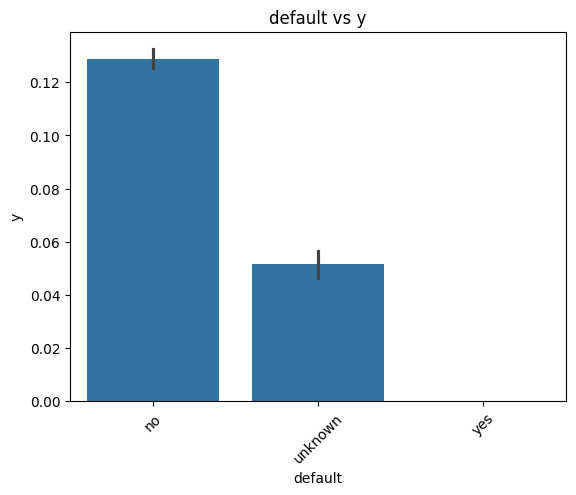

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


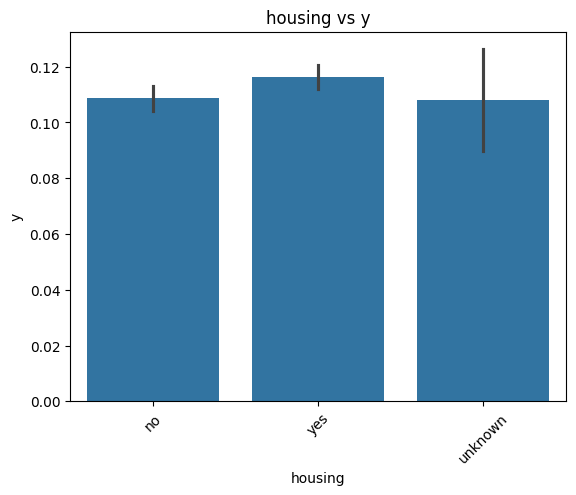

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


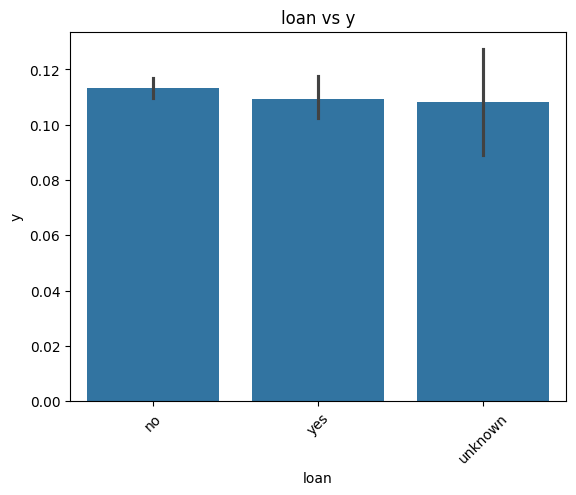

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


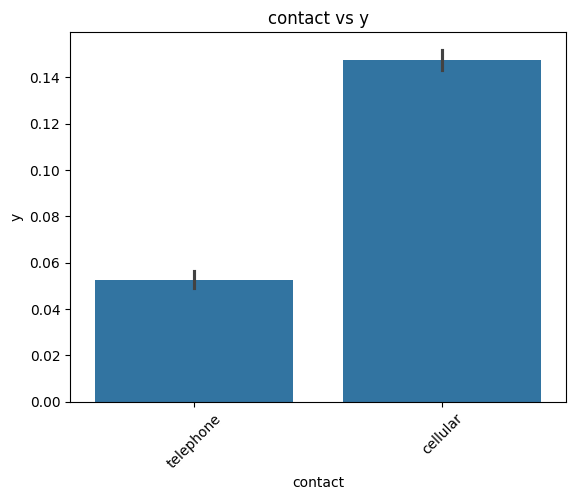

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


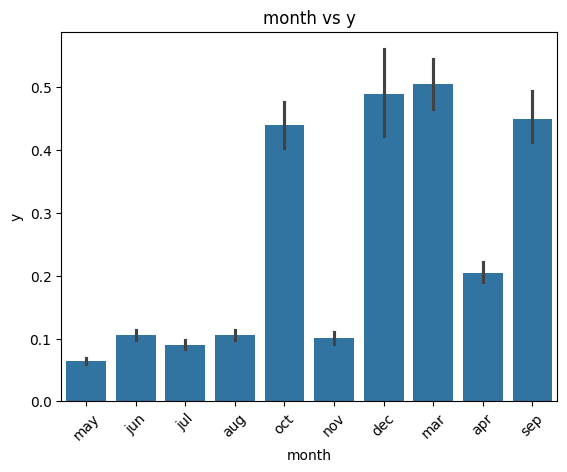

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


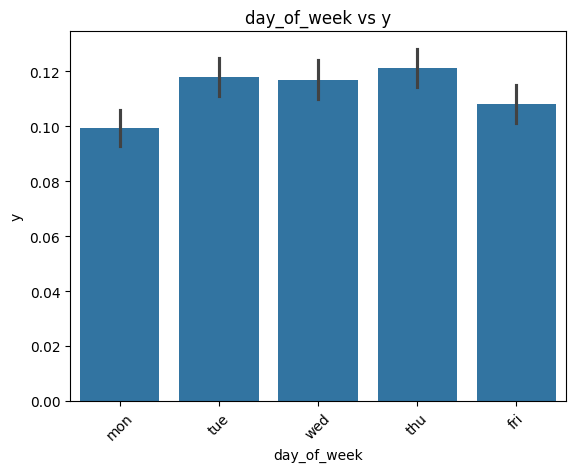

/tmp/ipython-input-478040016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))


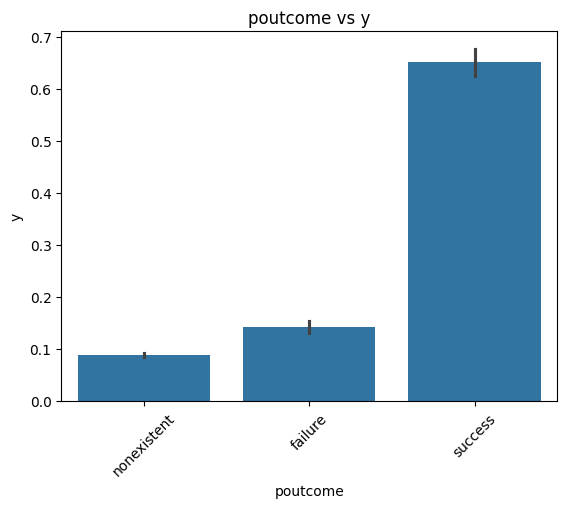

In [ ]:
# Двовимірний: категоріальні змінні vs y
for col in cat_cols:
    sns.barplot(x=col, y='y', data=df.replace({'y': {'yes': 1, 'no': 0}}))
    plt.xticks(rotation=45)
    plt.title(f'{col} vs y')
    plt.show()

###Кореляційна матриця (числові змінні)

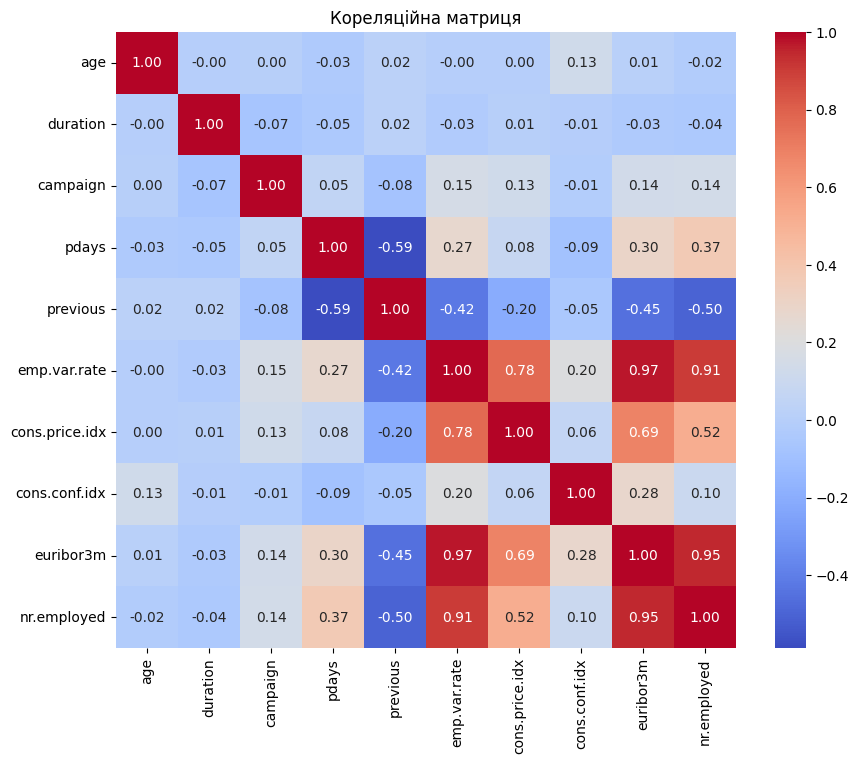

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

###Багатовимірний аналіз

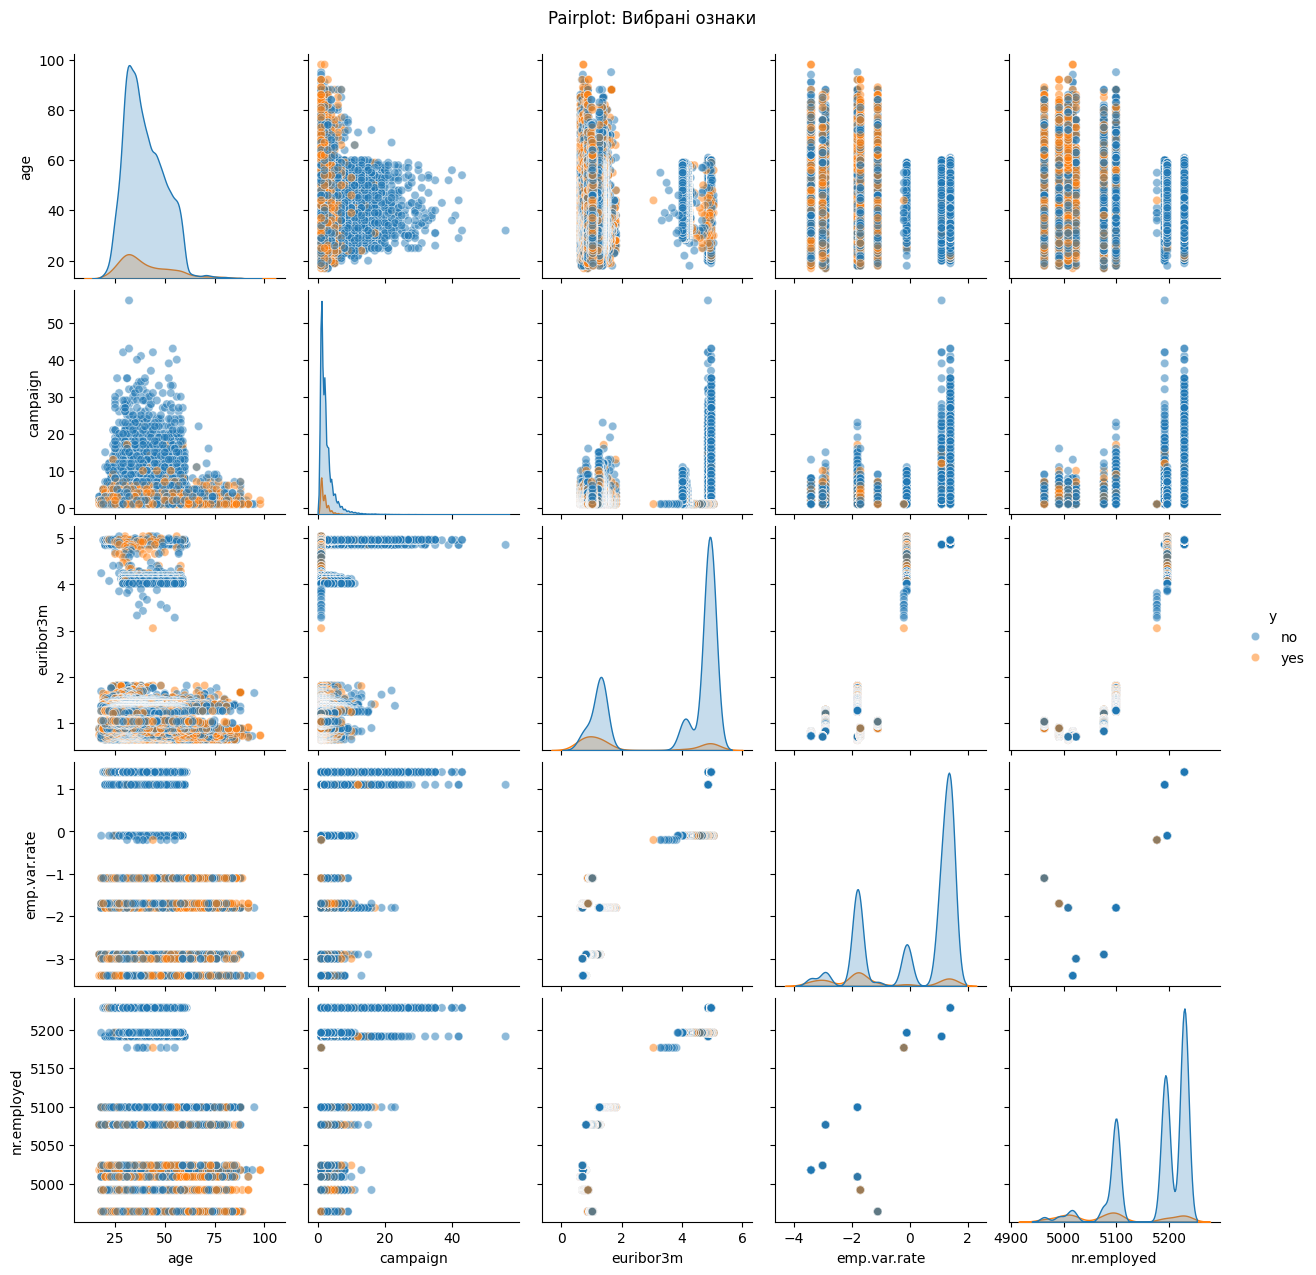

In [ ]:
# Багатовимірний аналіз: Pairplot з кольором по y
selected = ['age', 'campaign', 'euribor3m', 'emp.var.rate', 'nr.employed']
sns.pairplot(df[selected + ['y']], hue='y', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot: Вибрані ознаки", y=1.02)
plt.show()

**Загальний висновок**

 Тип задачі - це бінарна класифікація:
Цільова змінна `y` набуває значень `yes` або `no`, що означає — клієнт підписав строковий депозит чи ні.

Доречні методи моделювання:

- Базові моделі:

Логістична регресія (швидка, інтерпретована модель, дає хорошу базову оцінку)

- Дерева рішень і ансамблі:

Decision Tree Classifier (інтерпретований, але схильний до перенавчання)

Random Forest (стабільний, добре працює з незначною підготовкою даних)

Gradient Boosting (XGBoost, LightGBM, CatBoost)(висока точність, гарно обробляє незбалансованість і різні типи змінних, часто найкращий вибір для подібних задач)

- Інші методи:

kNN – для тестування простих рішень

`yes` лише близько 11% - набір даних незбалансований, тому accuracy не підходить як метрика.

Обрана метрика якості моделі -  AUROC (Area Under the ROC Curve): незалежна від порогу класифікації, враховує співвідношення TPR (Recall) і FPR, найкраща для незбалансованих наборів даних, відображає здатність моделі відділяти класи.



##Препроцесинг даних

###Препроцесинг-клас у вигляді sklearn Pipeline з кастомним трансформером.

Цей клас:

- Групує категорії
- Обробляє пропущені значення
- Створює нові ознаки
- Обробляє викиди
- Кодує категоріальні змінні
- Видаляє duration (інформаційно витікаюча змінна)

In [ ]:
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = X.copy()

        # Запам’ятовуємо моду для імпутації "unknown"
        self.mode_imputers = {}
        for col in ['job', 'education', 'default', 'housing', 'loan']:
            self.mode_imputers[col] = X[col].replace('unknown', np.nan).mode()[0]
        return self

    def transform(self, X):
        X = X.copy()

        # Видаляємо duration
        if 'duration' in X.columns:
            X.drop(columns=['duration'], inplace=True)

        # Групування категорій у education
        X['education'] = X['education'].replace({
            'basic.4y': 'basic',
            'basic.6y': 'basic',
            'basic.9y': 'basic'
        })

        # Заповнюємо unknown
        for col in ['job', 'education', 'default', 'housing', 'loan']:
            X[col] = X[col].replace('unknown', np.nan)
            X[col] = X[col].fillna(self.mode_imputers[col])

        # Створення нових ознак
        X['has_loan_or_housing'] = ((X['loan'] == 'yes') | (X['housing'] == 'yes')).astype(int)
        X['contacted_before'] = (X['previous'] > 0).astype(int)
        X['recent_contact'] = (X['pdays'] != 999).astype(int)

        # Заміна month на season
        month_map = {
            'mar': 'spring', 'apr': 'spring', 'may': 'spring',
            'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
            'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn',
            'dec': 'winter', 'jan': 'winter', 'feb': 'winter'
        }
        X['season'] = X['month'].map(month_map)
        X.drop(columns=['month'], inplace=True)

        # Обробка викидів для віку
        Q1 = X['age'].quantile(0.25)
        Q3 = X['age'].quantile(0.75)
        IQR = Q3 - Q1
        X['age'] = np.clip(X['age'], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

        return X


###Повний Pipeline

In [ ]:
# Список ознак
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'day_of_week', 'poutcome', 'season'
]
numerical_cols = [
    'age', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed',
    'has_loan_or_housing', 'contacted_before', 'recent_contact'
]

# Колонки обробки
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='drop')

# Повний pipeline
full_pipeline = Pipeline(steps=[
    ('custom', CustomPreprocessor()),
    ('preprocessor', preprocessor)
])

## Тренування різних типів моделей машинного навчання

